In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz


In [ ]:
df = pd.read_csv("card_transdata.csv")

In [ ]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
a = df.head(10000)
a.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
a.tail(10000)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
9995,4.225100,2.678220,0.556858,1.0,0.0,0.0,1.0,0.0
9996,3.614858,0.431593,0.061778,1.0,0.0,0.0,1.0,0.0
9997,10.131863,10.262508,2.818090,1.0,0.0,0.0,1.0,0.0
9998,16.306236,0.014054,1.904495,1.0,0.0,0.0,1.0,0.0


In [ ]:
df.shape

(1000000, 8)

In [ ]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [ ]:
df.isnull()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False


In [ ]:
df.notnull()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
999995,True,True,True,True,True,True,True,True
999996,True,True,True,True,True,True,True,True
999997,True,True,True,True,True,True,True,True
999998,True,True,True,True,True,True,True,True


In [ ]:
pd.unique(df.used_pin_number)

array([0., 1.])

In [ ]:
df.info

<bound method DataFrame.info of         distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2            

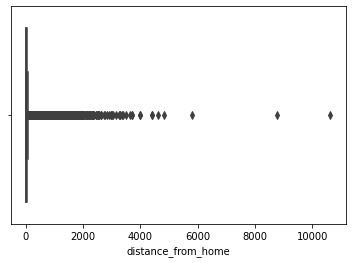

In [ ]:
sns.boxplot(x=df['distance_from_home'])

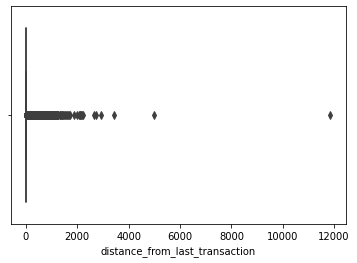

In [ ]:
sns.boxplot(x=df['distance_from_last_transaction'])

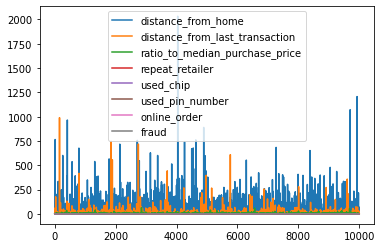

In [ ]:
a.plot()

([<matplotlib.patches.Wedge at 0x7f9898edb460>,
  ...],
 [Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.0999923251494699, 0.004109088982148003, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.099969300704976, 0.008218120624943726, ''),
  Text(1.0999309269878081, 0.012327037589835022, ''),
  Text(1.09987720453

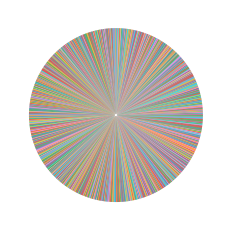

In [ ]:
x = a.fraud
plt.pie(x)

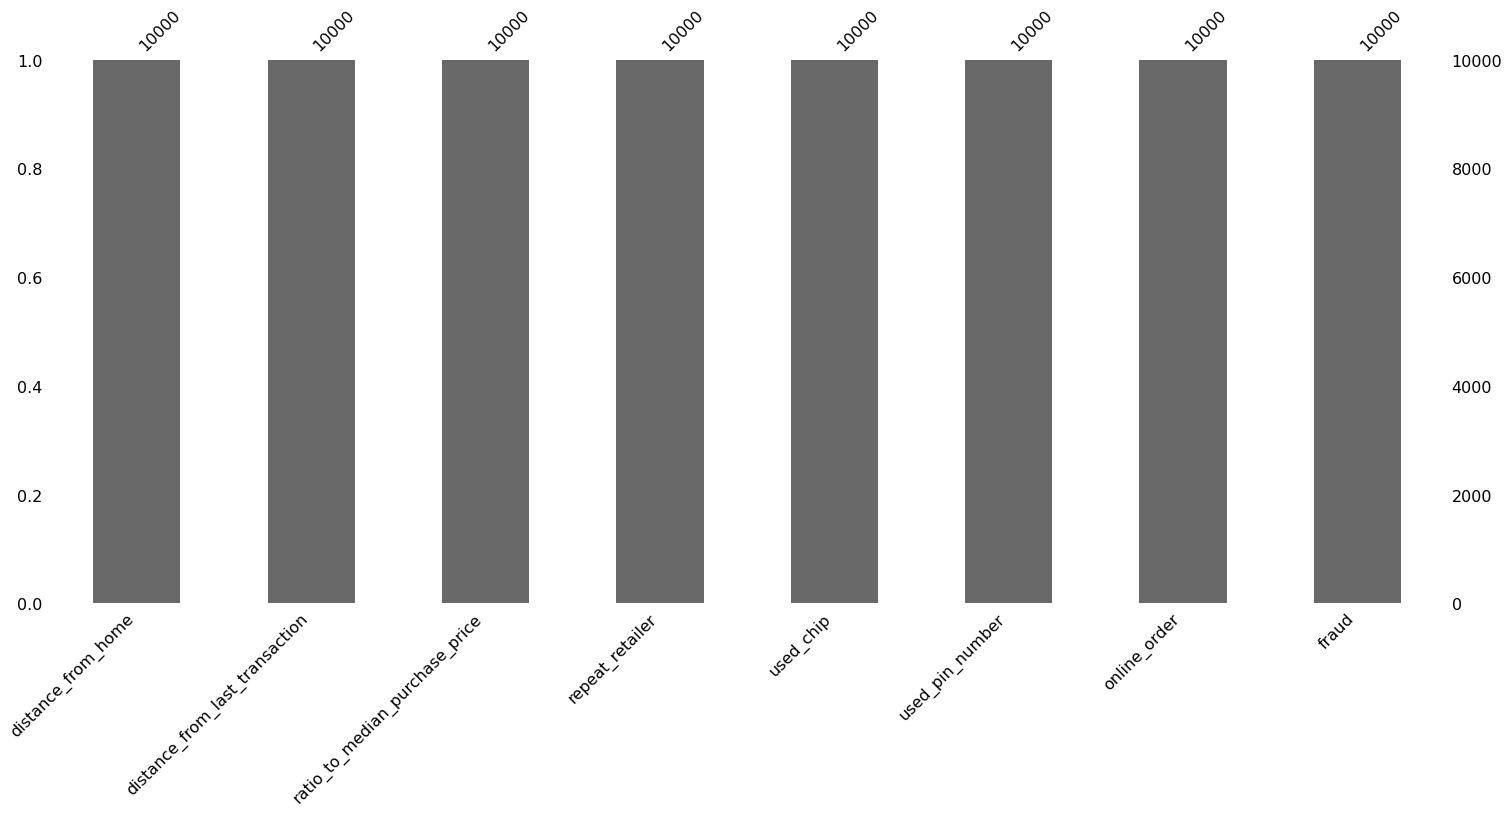

In [ ]:
import missingno as msno

msno.bar(a)
plt.show()

In [ ]:
feature=df.drop('fraud',axis=1)
target=df.fraud

In [ ]:
X_train,X_test, Y_train,Y_test=train_test_split(feature,target,test_size = 0.5, random_state=0)

In [ ]:
a=StandardScaler()
X_train = a.fit_transform(X_train)
X_test = a.transform(X_test)

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(X_train,Y_train)   

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
Y_pred =clf.predict(X_test)

In [ ]:

cm=confusion_matrix(Y_test,Y_pred)
cm

array([[456243,      4],
       [    12,  43741]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred) 

0.999968

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf1=GaussianNB()
clf1.fit(X_train,Y_train)   
Y_pred =clf1.predict(X_test)

cm=confusion_matrix(Y_test,Y_pred)
cm

array([[449004,   7243],
       [ 18386,  25367]])

In [ ]:
accuracy_score(Y_test,Y_pred) 

0.948742